<a href="https://colab.research.google.com/github/rajatjpatel/MCAD/blob/main/mcad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description: This program uses the Moving Average Convergence/Divergence (MCAD)crossover
#                   to determine when to buy and sell stock.
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [23]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (4).csv


In [24]:
#Store the Data into DataFrame as df
df = pd.read_csv('AAPL.csv')
#Set the Data to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the Data
df

,Date,Open,High,Low,Close,Adj Close,Volume
1980-12-12,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600.0
1980-12-15,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800.0
1980-12-16,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000.0
1980-12-17,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600.0
1980-12-18,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600.0
...,...,...,...,...,...,...,...
2021-03-01,2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300.0
2021-03-02,2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300.0
2021-03-03,2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400.0
2021-03-04,2021-03-04,121.750000,123.599998,118.620003,120.129997,120.129997,177275300.0


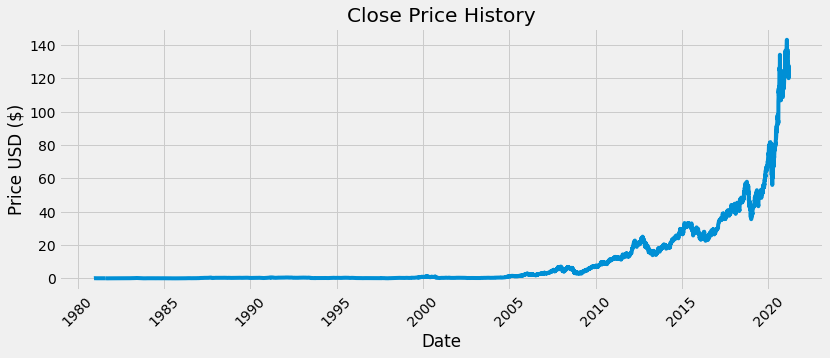

In [18]:
#Visully show the stock price 
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [10]:
#Calculate the MACD and Signal Line indicators
#Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#Calculate the log term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD Line
MACD = ShortEMA - LongEMA
#Calculate the Signal Line
signal = MACD.ewm(span=9, adjust=False).mean()

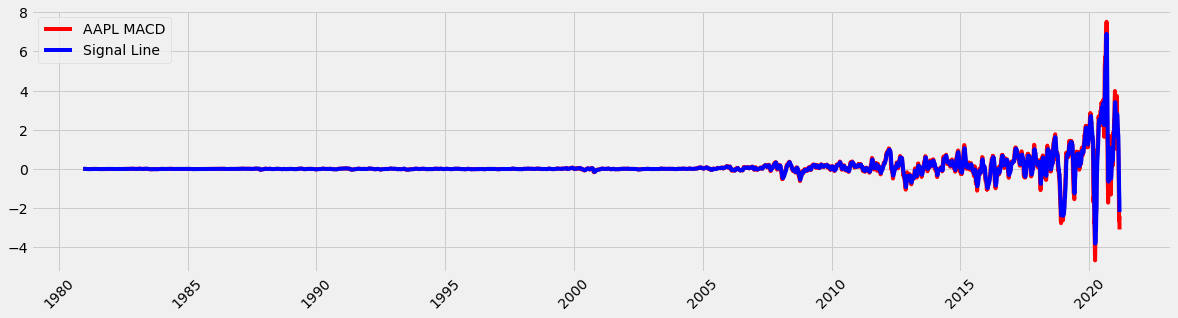

In [19]:
#Plot the Chart
plt.figure(figsize=(18.2, 4.5))
plt.plot(df.index, MACD, label= 'AAPL MACD', color= 'red')
plt.plot(df.index, signal, label='Signal Line', color= 'blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [27]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the database
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
1980-12-12,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600.0,0.000000,0.000000
1980-12-15,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800.0,-0.000534,-0.000107
1980-12-16,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000.0,-0.001659,-0.000417
1980-12-17,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600.0,-0.002299,-0.000793
1980-12-18,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600.0,-0.002506,-0.001136
...,...,...,...,...,...,...,...,...,...
2021-03-01,2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300.0,-2.410079,-1.233216
2021-03-02,2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300.0,-2.436621,-1.473897
2021-03-03,2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400.0,-2.673751,-1.713868
2021-03-04,2021-03-04,121.750000,123.599998,118.620003,120.129997,120.129997,177275300.0,-2.983027,-1.967700


In [38]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan) 
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
            Sell.append(signal['Close'][i])
            flag = 0
      else:
            Sell.append(np.nan)
    else:
        Buy.append(np.nan)
        Sell.append(np.nan)       

    return (Buy, Sell)

In [49]:
#Create Buy and Sell Column
b = buy_sell(df)
df['Buy_Signal_Price'] = b[0]
df['Sell_Signal_Price'] = b[1]

ValueError: ignored

In [45]:
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
1980-12-12,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600.0,0.000000,0.000000
1980-12-15,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800.0,-0.000534,-0.000107
1980-12-16,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000.0,-0.001659,-0.000417
1980-12-17,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600.0,-0.002299,-0.000793
1980-12-18,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600.0,-0.002506,-0.001136
...,...,...,...,...,...,...,...,...,...
2021-03-01,2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300.0,-2.410079,-1.233216
2021-03-02,2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300.0,-2.436621,-1.473897
2021-03-03,2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400.0,-2.673751,-1.713868
2021-03-04,2021-03-04,121.750000,123.599998,118.620003,120.129997,120.129997,177275300.0,-2.983027,-1.967700


In [47]:
#Visually show  the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1 )
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1 )
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left') 
plt.show()  

KeyError: ignored

<Figure size 878.4x324 with 0 Axes>